# Import the Libraries

In [2]:
!pip install citipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime
from scipy.stats import linregress
from citipy import citipy
from statsmodels.formula.api import ols
import statistics as st
from scipy import stats
import statsmodels.api as sm
import sklearn

# Import the Dataset

In [2]:
data = pd.read_csv("uber-rides-dataset.csv")
data

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,"April 23, 2018 at 12:11PM",Completed,Uber,ce5bdea8e9c366b2f9f9cdf1bb879965,e96ad9d6f2f0b2c55b2fa2c284507543,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,...,5.79,2018-04-23T11:59:00,6,4,0.39,2.57,0.18,clear-day,Clear,none
674,"April 24, 2018 at 02:58PM",Completed,Uber,3a1df88ce67d8f749ac5f09da8b4dadf,e63e621e61b493e119239f5ff635810d,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,...,11.46,2018-04-24T14:21:00,7,3,0.62,5.37,0.48,partly-cloudy-day,Partly Cloudy,none
675,"April 26, 2018 at 03:57PM",Completed,Uber,1879ce44367d4cc555479253323ec36d,b65196da38435a1dbe8e9009b514a7b8,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,...,6.68,2018-04-26T15:22:00,8,6,0.76,4.02,0.9,partly-cloudy-day,Mostly Cloudy,none
676,"April 26, 2018 at 05:00PM",Completed,Uber,7a237cb245b6ca854498ecb7c842beb3,2af94300321de81edc1eeef8c041fd9a,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,...,7.48,2018-04-26T16:37:00,9,7,0.68,4.28,0.79,partly-cloudy-day,Mostly Cloudy,none


##### ELIMINATE IRRELEVANT FEATURES

In [3]:
data.columns

Index(['trip_completed_at', 'trip_status', 'ride_hailing_app', 'trip_uid',
       'driver_uid', 'rider_uid', 'customer', 'trip_start_time',
       'trip_end_time', 'trip_time', 'total_time', 'wait_time', 'trip_type',
       'surge_multiplier', 'vehicle_make_model', 'vehicle_license_plate',
       'driver_name_en', 'vehicle_make', 'vehicle_model', 'driver_gender',
       'driver_photo_url', 'driver_phone_number', 'pickup_lat', 'pickup_long',
       'dropoff_lat', 'dropoff_long', 'trip_map_image_url',
       'trip_path_image_url', 'city', 'country', 'trip_start_address',
       'trip_end_address', 'rub_usd_exchange_rate', 'price_rub', 'price_usd',
       'distance_kms', 'temperature_time', 'temperature_value', 'feels_like',
       'humidity', 'wind_speed', 'cloudness', 'weather_main', 'weather_desc',
       'precipitation'],
      dtype='object')

In [4]:
data1 = data.drop(['trip_completed_at', 'trip_uid', 'driver_uid', 'rider_uid', 'customer', 
                   'vehicle_license_plate', 'driver_name_en', 'vehicle_make', 'vehicle_model', 
                   'driver_photo_url', 'driver_phone_number', 'trip_map_image_url','trip_path_image_url', 
                   'country', 'trip_start_address', 'trip_end_address', 'temperature_time', 'weather_desc', 'precipitation'], axis = 1)
data1

,trip_status,ride_hailing_app,trip_start_time,trip_end_time,trip_time,total_time,wait_time,trip_type,surge_multiplier,vehicle_make_model,...,rub_usd_exchange_rate,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main
0,Completed,Uber,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,00:29:00,00:07:27,uberX,1.0,Ford Focus,...,51.28,265.00,5.17,9.29,12,12,0.69,4.81,0.78,partly-cloudy-day
1,Completed,Uber,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,00:26:00,00:06:33,uberX,1.0,Hyundai Solaris,...,51.28,255.00,4.97,9.93,10,10,0.70,6.53,0.66,partly-cloudy-day
2,Completed,Uber,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,01:23:00,00:16:07,uberX,1.0,Renault Fluence,...,49.50,644.00,13.01,18.01,14,14,0.61,5.25,0.86,partly-cloudy-day
3,Completed,Uber,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,00:20:00,00:06:23,uberBLACK,2.9,Mercedes-Benz E-Class,...,49.53,1287.00,25.99,5.10,3,3,0.84,0.87,0.56,partly-cloudy-night
4,Completed,Uber,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,00:49:00,00:10:06,uberX,1.4,Hyundai Solaris,...,49.53,665.00,13.43,21.92,3,1,0.90,1.61,0.31,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Completed,Uber,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,00:12:00,00:01:23,uberX,1.0,Hyundai Solaris,...,61.82,161.00,2.60,5.79,6,4,0.39,2.57,0.18,clear-day
674,Completed,Uber,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,00:37:00,00:13:19,uberX,1.0,Dongfeng H30,...,61.54,241.00,3.92,11.46,7,3,0.62,5.37,0.48,partly-cloudy-day
675,Completed,Uber,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,00:35:00,00:18:40,uberX,1.0,Chevrolet Aveo,...,62.68,174.00,2.78,6.68,8,6,0.76,4.02,0.9,partly-cloudy-day
676,Completed,Uber,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,00:23:00,00:03:41,uberX,1.0,Skoda Rapid,...,62.68,209.00,3.33,7.48,9,7,0.68,4.28,0.79,partly-cloudy-day


##### DATA MANIPULATION

In [5]:
data1_2 = data1[(data1["trip_status"] == "Completed") & (data1["ride_hailing_app"] == "Uber")]
data1 = data1_2.drop(["trip_status", "ride_hailing_app"], axis = 1)
data1

,trip_start_time,trip_end_time,trip_time,total_time,wait_time,trip_type,surge_multiplier,vehicle_make_model,driver_gender,pickup_lat,...,rub_usd_exchange_rate,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main
0,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,00:29:00,00:07:27,uberX,1.0,Ford Focus,Male,60.031438,...,51.28,265.00,5.17,9.29,12,12,0.69,4.81,0.78,partly-cloudy-day
1,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,00:26:00,00:06:33,uberX,1.0,Hyundai Solaris,Male,59.963014,...,51.28,255.00,4.97,9.93,10,10,0.70,6.53,0.66,partly-cloudy-day
2,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,01:23:00,00:16:07,uberX,1.0,Renault Fluence,Male,60.031529,...,49.50,644.00,13.01,18.01,14,14,0.61,5.25,0.86,partly-cloudy-day
3,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,00:20:00,00:06:23,uberBLACK,2.9,Mercedes-Benz E-Class,Male,59.959883,...,49.53,1287.00,25.99,5.10,3,3,0.84,0.87,0.56,partly-cloudy-night
4,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,00:49:00,00:10:06,uberX,1.4,Hyundai Solaris,Male,59.934813,...,49.53,665.00,13.43,21.92,3,1,0.90,1.61,0.31,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,00:12:00,00:01:23,uberX,1.0,Hyundai Solaris,Male,59.939274,...,61.82,161.00,2.60,5.79,6,4,0.39,2.57,0.18,clear-day
674,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,00:37:00,00:13:19,uberX,1.0,Dongfeng H30,Male,59.941415,...,61.54,241.00,3.92,11.46,7,3,0.62,5.37,0.48,partly-cloudy-day
675,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,00:35:00,00:18:40,uberX,1.0,Chevrolet Aveo,Male,59.941415,...,62.68,174.00,2.78,6.68,8,6,0.76,4.02,0.9,partly-cloudy-day
676,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,00:23:00,00:03:41,uberX,1.0,Skoda Rapid,Male,59.916862,...,62.68,209.00,3.33,7.48,9,7,0.68,4.28,0.79,partly-cloudy-day


##### DATA INTEGRATION AND COMBINATION

# EDA

In [6]:
# Select the Columns we need
distance_type = data1.loc[:, ["distance_kms", "price_usd"]]

# Create the bins in which the distances will be held
bins = [0, 5, 10, 15, 20, 47]

#Create the names for the 5 bins
distance_names = ["Very Short Trip", "Short Trip", "Medium Trip", "Long trip", "Very Long Trip"]

# Assign the values to the bins
distance_type["Type of Distance"] = pd.cut(distance_type["distance_kms"], bins, labels = distance_names)

# Calculate average price per distance bin
avg_price = distance_type.groupby(['Type of Distance'])["price_usd"].mean()

# Calculate the count per distance bin
count = distance_type.groupby(['Type of Distance']).count()

In [7]:
count

,distance_kms,price_usd
Type of Distance,,
Very Short Trip,160,160
Short Trip,254,254
Medium Trip,119,119
Long trip,34,34
Very Long Trip,65,65


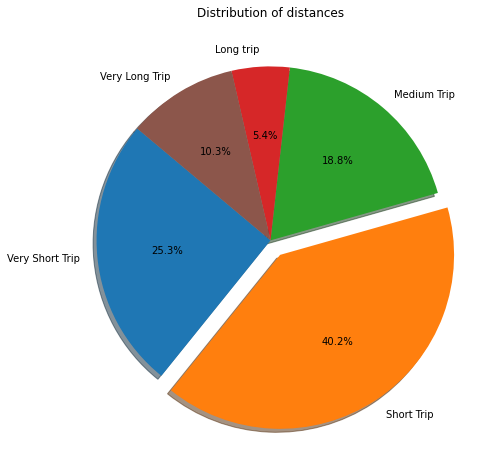

In [8]:
# Columns into arrays
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0, 0.1, 0, 0, 0)
plt.figure(figsize = (10,8))
plt.pie(count.distance_kms, labels = distance_names, explode = explode, colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title("Distribution of distances")
plt.show()

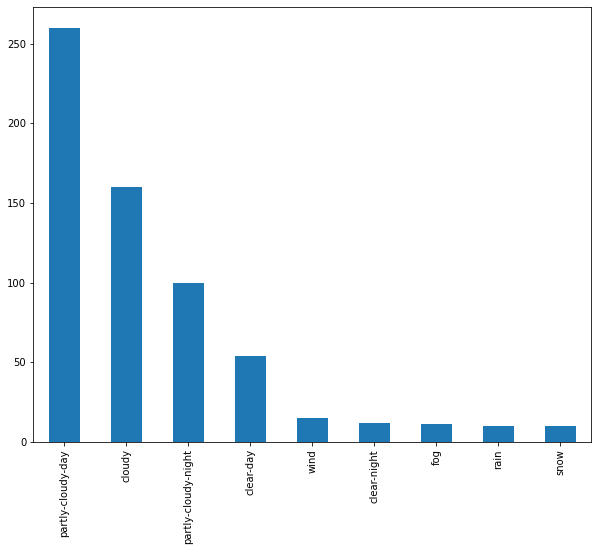

In [9]:
# Plot number of trips for each weather description
x = data1['weather_main'].value_counts().plot(kind = 'bar', figsize = (10,8))
plt.show()

The above bar chart shows the trip count for each type of weather. We can see that majority of trips were taken during partly cloudy days.

In [10]:
# Create pie plot for the vehicle make model
vehicle_count = pd.DataFrame(data.groupby(["vehicle_make_model"]).count()).reset_index()

# Filter the DataFrame down only to those columns to chart
vehicle_count1 = vehicle_count[["vehicle_make_model","driver_uid"]]
vehicle_count2 = vehicle_count1.rename(columns={"driver_uid": "Count"})

# Sort data in descending order
vehicle_count3 = vehicle_count2.sort_values('Count', ascending=False)


# the top 5
top_five = vehicle_count3[:5].copy()

# Other vehicles
other_vehicles = pd.DataFrame(data = {
    'vehicle_make_model' : ['others'],
    'Count' : [vehicle_count3['Count'][5:].sum()]
})

# Combining top 5 with others
top_five_others = pd.concat([top_five, other_vehicles])

<AxesSubplot:ylabel='Count'>

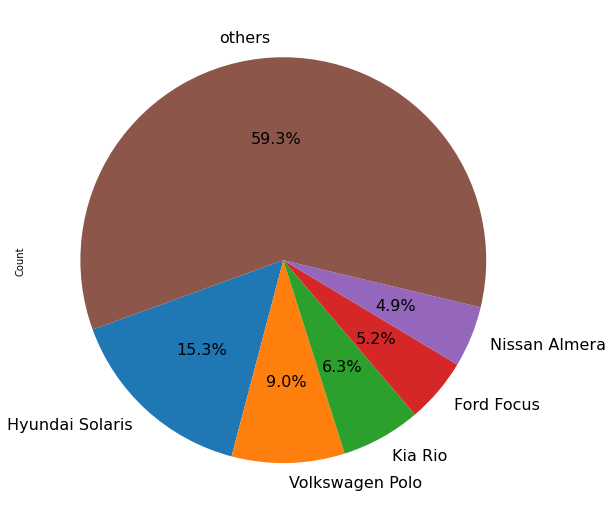

In [11]:
#plotting the 5 top vehicles with the others
plt.figure(figsize = (20,20))
ax1 = plt.subplot(121, aspect = 'equal')
top_five_others.plot(kind = 'pie', y = "Count", ax = ax1, autopct = '%1.1f%%', 
 startangle = 200, shadow = False, labels = top_five_others['vehicle_make_model'], legend = False, fontsize = 16)

The above pie chart shows the top 5 vehicle make models used by UBER drivers in Russia. The 1st one is the Hyunday Solaris, a south Korean car, which is sold as Hyundai Accent in the USA. For the Russian market it is assembled by the TagAZ plant in Taganrog. The 2nd one is the Volkswagen Polo, a car produced by the German manufacturer Volkswagen since 1975. The 3rd one is Kia Rio, another South Korean car.

In [12]:
# Set Index to vehicle make model
top_five = top_five.set_index("vehicle_make_model")

In [13]:
top_five

,Count
vehicle_make_model,
Hyundai Solaris,104
Volkswagen Polo,61
Kia Rio,43
Ford Focus,35
Nissan Almera,33


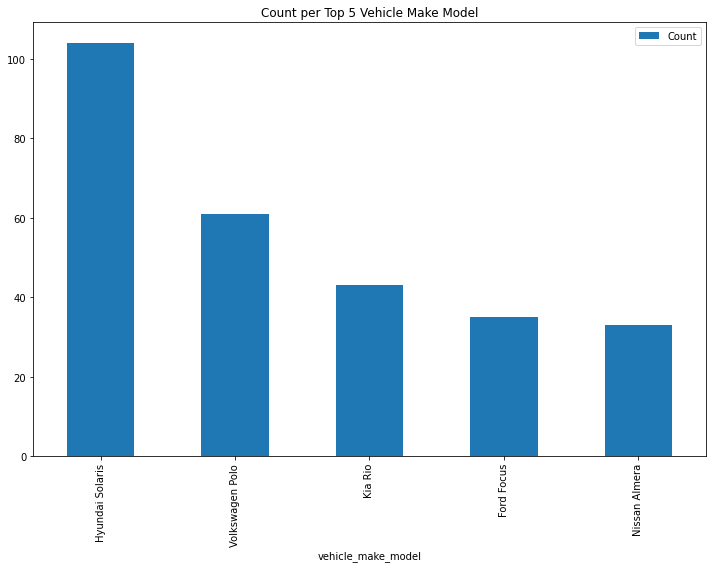

In [14]:
# Plot a bar chart with the same information
top_five.plot(kind = "bar", figsize = (10,8))

# Set a title for the chart
plt.title("Count per Top 5 Vehicle Make Model")
plt.tight_layout()
plt.show()

In [15]:
# Calculate the number of male and female drivers
gender_count = data1["driver_gender"].value_counts()

# Calculate the percentage of male and female drivers
percent_count = round((gender_count) / len(data1['driver_gender']) * 100, 2)

# Create a summary table for genders
gender_table = pd.DataFrame({"Gender Count": gender_count, "Gender Percentage" : percent_count})

In [16]:
gender_table

,Gender Count,Gender Percentage
Male,613,96.99
Female,19,3.01


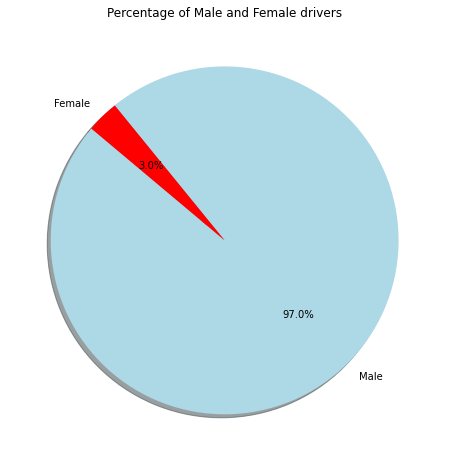

In [17]:
# Create a pie chart for genders
fig = plt.figure(figsize = (8,8))
labels = 'Male', 'Female'
sizes = percent_count
colors = ["lightblue", "red"]
plt.pie(sizes, labels = labels, colors = colors, shadow = True, autopct = '%1.1f%%', startangle = 140)
plt.title("Percentage of Male and Female drivers")
plt.show()

In [18]:
# Show wait time and convert to time format 
wait_df = data1['wait_time']
wait_df = pd.to_datetime(data1['wait_time'])

In [19]:
wait_df1 = pd.DataFrame(wait_df)
wait_df1

,wait_time
0,2022-08-23 00:07:27
1,2022-08-23 00:06:33
2,2022-08-23 00:16:07
3,2022-08-23 00:06:23
4,2022-08-23 00:10:06
...,...
673,2022-08-23 00:01:23
674,2022-08-23 00:13:19
675,2022-08-23 00:18:40
676,2022-08-23 00:03:41


In [20]:
# Find all the trips dates 
start_df = data1['trip_start_time']
start_df = pd.to_datetime(start_df).reset_index()

trip_number = start_df['index']
trip_date = start_df['trip_start_time']

# Show table with all the trips and dates
trip_dates_df = pd.DataFrame({"Trip Number": trip_number, "Trip Date": trip_date})

In [21]:
# Show the year and month for each trip 
trip_dates_df['Year'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.year))
trip_dates_df['Month'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.month))

new_trip_table = pd.DataFrame({"Trip Number": trip_number, 
                               "Trip Date": trip_date, 
                               "Month": (trip_dates_df['Month']), 
                               "Year": (trip_dates_df['Year']), 
                               "Wait Time by Minutes": (wait_df.dt.minute)})

In [22]:
# Find the average wait time per month
wait_df_mean = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].mean()

In [23]:
# Find the maximum wait time per month
wait_df_by_max = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].max()

In [24]:
# Find the minimum wait time per month
wait_df_by_min = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].min()

In [25]:
all_wait_df = pd.DataFrame({"Maximum Wait": (wait_df_by_max), 
                          "Average Wait": (wait_df_mean), 
                            "Minimum Wait": (wait_df_by_min)})

In [26]:
all_wait_df

Maximum Wait  Average Wait  Minimum Wait
Year Month                                          
2015 10             17.0      7.500000           4.0
     11             17.0     10.400000           6.0
     12             17.0     10.600000           6.0
     5              17.0      9.333333           3.0
     6              24.0     10.612903           1.0
     7              14.0     12.000000           8.0
     9              22.0      9.057692           0.0
2016 1              15.0      9.500000           6.0
     10             10.0      6.000000           0.0
     11             11.0      6.312500           2.0
     12             12.0      7.117647           1.0
     2              18.0     11.000000           5.0
     3               6.0      5.333333           4.0
     4               9.0      6.333333           2.0
     5              13.0      5.291667           0.0
     6              13.0      6.785714           3.0
     7               8.0      5.600000           3.0
     8               9.0      6.166667           1.0
     9              14.0      8.000000           3.0
2017 1              11.0      7.000000           2.0
     10             10.0      9.000000           8.0
     11             21.0      7.441860           0.0
     12             39.0      7.562500           1.0
     2              14.0      8.500000           4.0
     3              12.0      8.285714           4.0
     4               9.0      6.000000           3.0
     5               9.0      5.375000           1.0
     6              11.0      5.090909           0.0
     7              10.0      7.533333           3.0
     8              15.0      7.791667           0.0
     9              12.0      7.750000           4.0
2018 1              29.0      8.769231           1.0
     2              16.0      6.575000           1.0
     3              16.0      7.088235           2.0
     4              16.0      7.555556           2.0

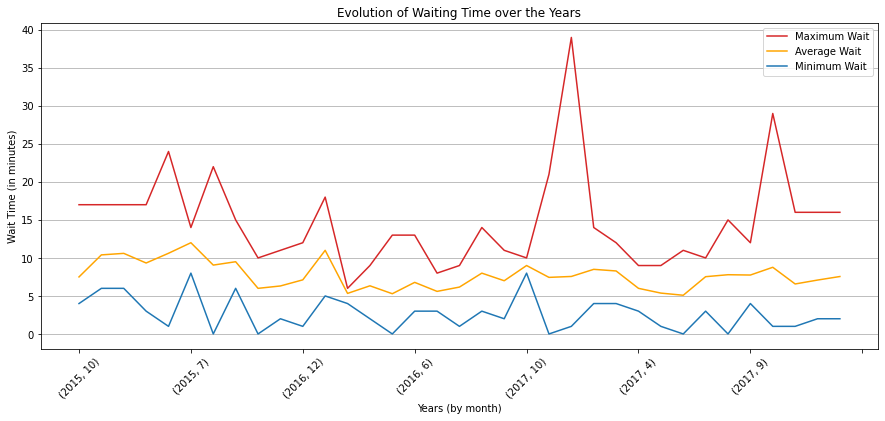

In [27]:
# Create a line graph showing the average, minimum and maximum wait time for each month
all_wait_df.plot(style='-', color =('tab:red', 'orange', 'tab:blue'), figsize=(15,6))

plt.xlabel("Years (by month)")
plt.ylabel("Wait Time (in minutes)")
plt.legend(loc="best")
plt.title("Evolution of Waiting Time over the Years")
plt.grid(axis='y')
plt.xticks(rotation = 45)
plt.show()

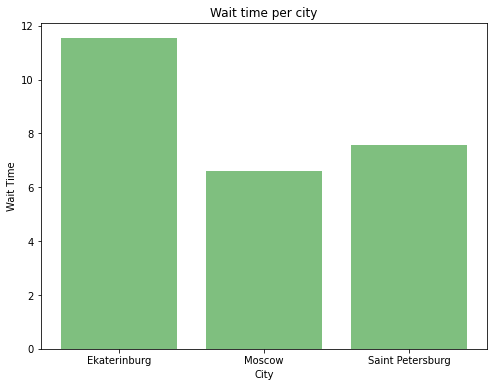

In [28]:
# Same, grouped by city
new_trip_table2 = pd.DataFrame({"Wait Time by Minutes": (wait_df.dt.minute), "City": (data1['city'])})

new_trip_table2 = new_trip_table2.groupby(['City'])['Wait Time by Minutes'].mean().reset_index()
new_trip_table2['City']

# create a bar chart grouped by city 
first_names12 = new_trip_table2['City']
total_names12 = np.arange(len(first_names12))
popularity12 = new_trip_table2['Wait Time by Minutes']

# Plot
fig = plt.figure(figsize = (8,6))
plt.bar(total_names12, popularity12, align='center', alpha=0.5, color='green')
plt.xticks(total_names12, first_names12)
plt.ylabel('Wait Time')
plt.xlabel('City')
plt.title("Wait time per city")
plt.show()

In [29]:
uber_data = pd.DataFrame(data1, columns= ["trip_start_time","pickup_lat","pickup_long","wait_time"])
uber_data = uber_data.rename(columns={"trip_start_time": "Date/Time", "pickup_lat": "lat","pickup_long": "long" })

In [30]:
#Convert The Date time column into Date, Time and Hour Column for detailed analysis
uber_data["Times"] = ""
tripDate = pd.to_datetime(uber_data["Date/Time"])
uber_data = uber_data.assign(Times = tripDate)
uber_data["Hour"] = uber_data.Times.dt.hour              # Split of Hour from Datetime Stamp
uber_data["Date"] = uber_data.Times.dt.date              # Split of Date from Datetime Stamp
uber_data["Times"] = uber_data.Times.dt.time             # Split of Time from Datetime Stamp
uber_data["WaitTimeInMinutes"] = pd.DatetimeIndex(uber_data["wait_time"]).minute           # Split of Time from Datetime Stamp
uber_data["Year"] = pd.DatetimeIndex(uber_data["Date"]).year

In [31]:
# Calculating the City Name using the latitude and Longitude using CitiPy package
# Performance optimisation was perfromed to process 1mn records faster
uber_data["CityName"] = ""
for row in uber_data.itertuples():     
     uber_data["CityName"][row.Index] = citipy.nearest_city(row.lat,row.long).city_name    

uber_data

<ipython-input-31-da2b0ed4b81a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data["CityName"][row.Index] = citipy.nearest_city(row.lat,row.long).city_name


,Date/Time,lat,long,wait_time,Times,Hour,Date,WaitTimeInMinutes,Year,CityName
0,2015-05-11 17:26:00,60.031438,30.329826,00:07:27,17:26:00,17,2015-05-11,7,2015,pargolovo
1,2015-05-11 18:46:00,59.963014,30.307313,00:06:33,18:46:00,18,2015-05-11,6,2015,saint petersburg
2,2015-05-13 09:15:00,60.031529,30.329416,00:16:07,09:15:00,9,2015-05-13,16,2015,pargolovo
3,2015-05-16 00:24:00,59.959883,30.311159,00:06:23,00:24:00,0,2015-05-16,6,2015,saint petersburg
4,2015-05-16 01:29:00,59.934813,30.308553,00:10:06,01:29:00,1,2015-05-16,10,2015,saint petersburg
...,...,...,...,...,...,...,...,...,...,...
673,2018-04-23 11:59:00,59.939274,30.416977,00:01:23,11:59:00,11,2018-04-23,1,2018,murino
674,2018-04-24 14:21:00,59.941415,30.366456,00:13:19,14:21:00,14,2018-04-24,13,2018,saint petersburg
675,2018-04-26 15:22:00,59.941415,30.366456,00:18:40,15:22:00,15,2018-04-26,18,2018,saint petersburg
676,2018-04-26 16:37:00,59.916862,30.451020,00:03:41,16:37:00,16,2018-04-26,3,2018,petro-slavyanka


In [32]:
#This code is to derive trip analysis for all cities of UBER Data processed 
uberTripsByTime = uber_data.groupby("Hour")["Hour"].count()
rush_hour_df = pd.DataFrame({ "Trip Count": uberTripsByTime })
rush_hour_df = rush_hour_df.reset_index()

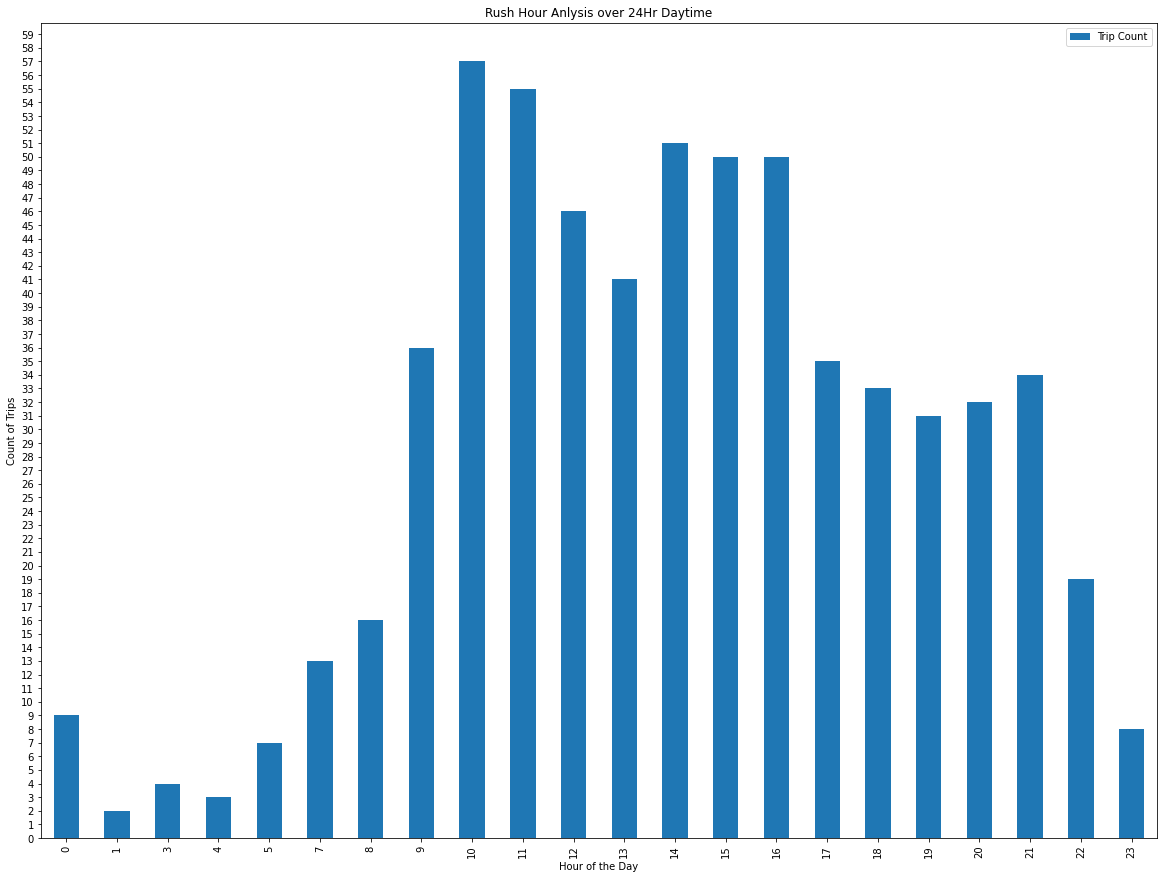

In [33]:
# Generate a bar plot to show Peak Rush Hour to Lowest Rush Hour using pandas
rush_hour_df.plot("Hour", "Trip Count", kind = "bar", figsize = (20,15))

# Set a title for the chart
plt.title(f"Rush Hour Anlysis over 24Hr Daytime")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Trips")
plt.yticks([j for j in range(0,60)])
plt.show()

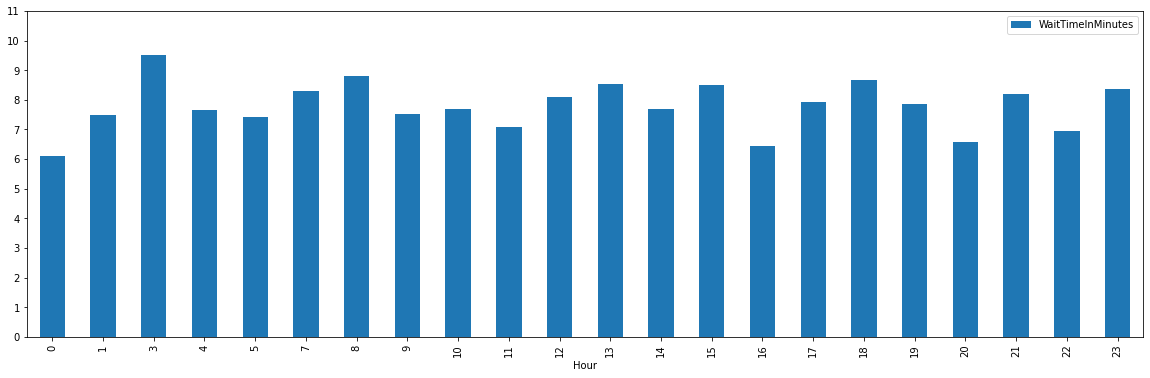

In [34]:
#Bar Plotting for Rush Hour Analysis based on wait time in each Hour of Day 
uberTripsByCity = uber_data.groupby("Hour")["WaitTimeInMinutes"].mean()
uberTripsByCity = uberTripsByCity.reset_index()
uberSummaryTrips2DF = pd.DataFrame(uberTripsByCity,columns=["Hour","WaitTimeInMinutes"])

#Plot
uberSummaryTrips2DF.plot("Hour","WaitTimeInMinutes",kind="bar",figsize=(20,6))
plt.yticks([j for j in range(0,12)])
plt.show()

# Data Preparation

## Handle Categorical Data

In [35]:
data1.dtypes

trip_start_time           object
trip_end_time             object
trip_time                 object
total_time                object
wait_time                 object
trip_type                 object
surge_multiplier         float64
vehicle_make_model        object
driver_gender             object
pickup_lat               float64
pickup_long              float64
dropoff_lat              float64
dropoff_long             float64
city                      object
rub_usd_exchange_rate    float64
price_rub                 object
price_usd                float64
distance_kms             float64
temperature_value          int64
feels_like                 int64
humidity                 float64
wind_speed               float64
cloudness                 object
weather_main              object
dtype: object

In [36]:
data2_1 = data1.replace({"driver_gender" : 'Female'}, 0).replace({"driver_gender" : 'Male'}, 1)
data2_2 = data2_1.replace({"weather_main" : 'clear-day'}, 9).replace({"weather_main" : 'clear-night'}, 8)
data2_3 = data2_2.replace({"weather_main" : 'partly-cloudy-day'}, 7).replace({"weather_main" : 'partly-cloudy-night'}, 6)
data2_4 = data2_3.replace({"weather_main" : 'wind'}, 5).replace({"weather_main" : 'cloudy'}, 4)
data2_5 = data2_4.replace({"weather_main" : 'rain'}, 3).replace({"weather_main" : 'fog'}, 2)
data2_6 = data2_5.replace({"weather_main" : 'snow'}, 1)

data2_7_1 = pd.get_dummies(data2_6.iloc[:, [5,13]])
data2_7_2 = data2_6.drop(["trip_type", "city"], axis = 1)
data2_7 = pd.concat([data2_7_2, data2_7_1], axis = 1).drop("vehicle_make_model", axis = 1)

data2_8_1 = data2_7.iloc[:,[21,22,23,24,25,26,27,28]].astype('int64')
data2_8_2 = data2_7[data2_7["cloudness"] != "Node Not Available"].iloc[:,[19]].astype(float)
data2_8_3 = data2_7.iloc[:,[j for j in range(0,29) if j not in [12,19,21,22,23,24,25,26,27,28]]]
data2_8_4 = pd.DataFrame(data2_7.iloc[:,12].str.replace(',', '').astype(float))
data2_8 = pd.concat([data2_8_3, data2_8_4, data2_8_2, data2_8_1], axis = 1)

data2_9 = data2_8.drop(["trip_start_time", "trip_end_time"], axis = 1)

In [37]:
data2_9['trip_time_'] = pd.to_datetime(data2_9.trip_time, format="%H:%M:%S")
data2_9['total_time_'] = pd.to_datetime(data2_9.total_time, format="%H:%M:%S")
data2_9['wait_time_'] = pd.to_datetime(data2_9.wait_time, format="%H:%M:%S")

In [38]:
data2_9["trip_time_hour"] = data2_9["trip_time_"].dt.hour
data2_9["trip_time_minute"] = data2_9["trip_time_"].dt.minute

data2_9["total_time_hour"] = data2_9["total_time_"].dt.hour
data2_9["total_time_minute"] = data2_9["total_time_"].dt.minute

data2_9["wait_time_hour"] = data2_9["wait_time_"].dt.hour
data2_9["wait_time_minute"] = data2_9["wait_time_"].dt.minute

data2_10_1 = data2_9.drop(["trip_time", "total_time", "wait_time", "trip_time_", "total_time_", "wait_time_", 
                           "trip_time_hour", "trip_time_minute", "total_time_hour", 
                           "total_time_minute", "wait_time_hour", "wait_time_minute"], axis = 1)
data2_10_2 = data2_9.iloc[:,[-1,-2,-3,-4,-5,-6]]
data2_10 = pd.concat([data2_10_2, data2_10_1], axis = 1)

In [39]:
data2_10.trip_time_hour.value_counts()

0    618
1     14
Name: trip_time_hour, dtype: int64

In [40]:
data2_11_1 = data2_10.replace({"wait_time_hour" : 1}, 60).replace({"wait_time_hour" : 2}, 120).replace({"trip_time_hour" : 1}, 60)
data2_11_2 = data2_11_1.replace({"total_time_hour" : 1}, 60).replace({"total_time_hour" : 2}, 120)

In [41]:
data2_11_2

,wait_time_minute,wait_time_hour,total_time_minute,total_time_hour,trip_time_minute,trip_time_hour,surge_multiplier,driver_gender,pickup_lat,pickup_long,...,price_rub,cloudness,trip_type_uberBEAUTY,trip_type_uberBLACK,trip_type_uberELKA,trip_type_uberSELECT,trip_type_uberX,city_Ekaterinburg,city_Moscow,city_Saint Petersburg
0,7,0,29,0,21,0,1.0,1,60.031438,30.329826,...,265.0,0.78,0,0,0,0,1,0,0,1
1,6,0,26,0,19,0,1.0,1,59.963014,30.307313,...,255.0,0.66,0,0,0,0,1,0,0,1
2,16,0,23,60,6,60,1.0,1,60.031529,30.329416,...,644.0,0.86,0,0,0,0,1,0,0,1
3,6,0,20,0,13,0,2.9,1,59.959883,30.311159,...,1287.0,0.56,0,1,0,0,0,0,0,1
4,10,0,49,0,38,0,1.4,1,59.934813,30.308553,...,665.0,0.31,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1,0,12,0,10,0,1.0,1,59.939274,30.416977,...,161.0,0.18,0,0,0,0,1,0,0,1
674,13,0,37,0,23,0,1.0,1,59.941415,30.366456,...,241.0,0.48,0,0,0,0,1,0,0,1
675,18,0,35,0,16,0,1.0,1,59.941415,30.366456,...,174.0,0.90,0,0,0,0,1,0,0,1
676,3,0,23,0,19,0,1.0,1,59.916862,30.451020,...,209.0,0.79,0,0,0,0,1,0,0,1


In [42]:
data2_11_2["wait_time(minute)"] = data2_11_2["wait_time_minute"] + data2_11_2["wait_time_hour"]
data2_11_2["total_time(minute)"] = data2_11_2["total_time_minute"] + data2_11_2["total_time_hour"]
data2_11_2["trip_time(minute)"] = data2_11_2["trip_time_minute"] + data2_11_2["trip_time_hour"]

data2_12 = data2_11_2.drop(["wait_time_minute","wait_time_hour",
                         "total_time_minute","total_time_hour",
                         "trip_time_minute","trip_time_hour"], axis = 1).iloc[:,0:-3]
data2_13 = data2_11_2.iloc[:,[-1,-2,-3]]

data3 = pd.concat([data2_13, data2_12], axis = 1).reset_index().drop("index", axis = 1)

In [43]:
data3.dtypes

trip_time(minute)          int64
total_time(minute)         int64
wait_time(minute)          int64
surge_multiplier         float64
driver_gender              int64
pickup_lat               float64
pickup_long              float64
dropoff_lat              float64
dropoff_long             float64
rub_usd_exchange_rate    float64
price_usd                float64
distance_kms             float64
temperature_value          int64
feels_like                 int64
humidity                 float64
wind_speed               float64
weather_main               int64
price_rub                float64
cloudness                float64
trip_type_uberBEAUTY       int64
trip_type_uberBLACK        int64
trip_type_uberELKA         int64
trip_type_uberSELECT       int64
trip_type_uberX            int64
city_Ekaterinburg          int64
city_Moscow                int64
city_Saint Petersburg      int64
dtype: object

## Handle Missing Values

In [44]:
data3.isnull().sum()

trip_time(minute)        0
total_time(minute)       0
wait_time(minute)        0
surge_multiplier         0
driver_gender            0
pickup_lat               0
pickup_long              0
dropoff_lat              0
dropoff_long             0
rub_usd_exchange_rate    0
price_usd                0
distance_kms             0
temperature_value        0
feels_like               0
humidity                 0
wind_speed               0
weather_main             0
price_rub                0
cloudness                1
trip_type_uberBEAUTY     0
trip_type_uberBLACK      0
trip_type_uberELKA       0
trip_type_uberSELECT     0
trip_type_uberX          0
city_Ekaterinburg        0
city_Moscow              0
city_Saint Petersburg    0
dtype: int64

In [45]:
data4 = data3.dropna().reset_index().drop("index", axis = 1)

In [46]:
data4.isnull().sum()

trip_time(minute)        0
total_time(minute)       0
wait_time(minute)        0
surge_multiplier         0
driver_gender            0
pickup_lat               0
pickup_long              0
dropoff_lat              0
dropoff_long             0
rub_usd_exchange_rate    0
price_usd                0
distance_kms             0
temperature_value        0
feels_like               0
humidity                 0
wind_speed               0
weather_main             0
price_rub                0
cloudness                0
trip_type_uberBEAUTY     0
trip_type_uberBLACK      0
trip_type_uberELKA       0
trip_type_uberSELECT     0
trip_type_uberX          0
city_Ekaterinburg        0
city_Moscow              0
city_Saint Petersburg    0
dtype: int64

## Handle Outliers

<AxesSubplot:>

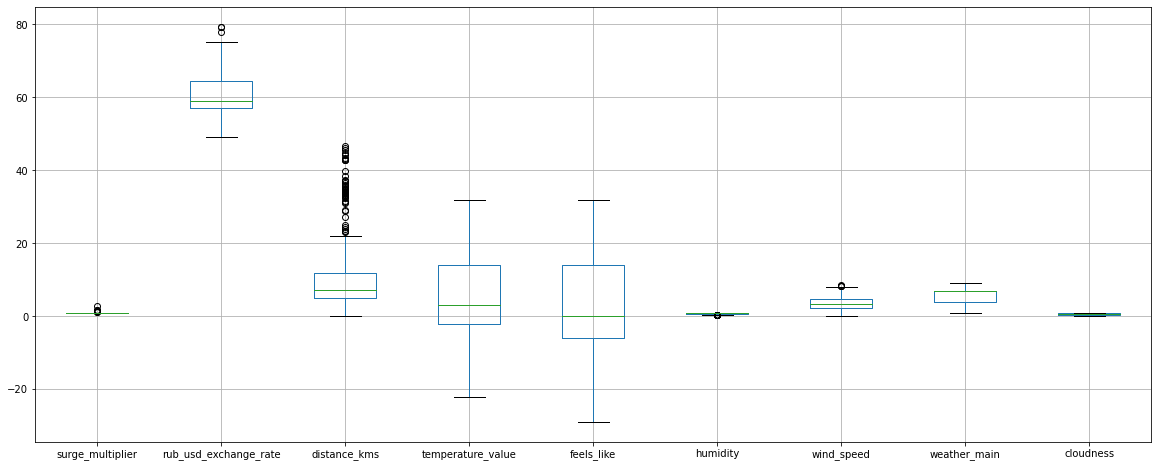

In [47]:
fig = plt.figure(figsize = (20,8))
data4.iloc[:,[3,9,11,12,13,14,15,16,18]].boxplot()

<AxesSubplot:>

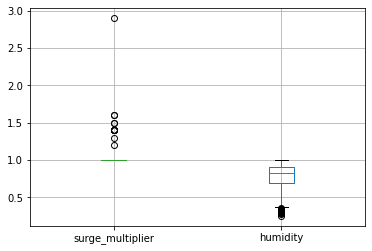

In [48]:
data4.iloc[:,[3,14]].boxplot()

In [49]:
#surge_multiplier
Q1 = data4.iloc[:,3].quantile(0.25)
Q3 = data4.iloc[:,3].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

1.0 1.0


In [50]:
#rub_usd_exchange_rate
Q1 = data4.iloc[:,9].quantile(0.25)
Q3 = data4.iloc[:,9].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

46.00250000000001 75.78249999999998


In [51]:
#distance_kms
Q1 = data4.iloc[:,11].quantile(0.25)
Q3 = data4.iloc[:,11].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-5.3475 22.1525


In [52]:
#humidity
Q1 = data4.iloc[:,14].quantile(0.25)
Q3 = data4.iloc[:,14].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

0.3674999999999998 1.2275


In [53]:
#wind_speed
Q1 = data4.iloc[:,15].quantile(0.25)
Q3 = data4.iloc[:,15].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-1.1374999999999997 8.1625


In [54]:
data4[(data4["surge_multiplier"] > 1) & (data4["rub_usd_exchange_rate"] > 75.78249999999998) & (data4["distance_kms"] > 22.1525)
     & (data4["humidity"] < 0.3674999999999998) & (data4["wind_speed"] < 8.1625)]

,trip_time(minute),total_time(minute),wait_time(minute),surge_multiplier,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,...,price_rub,cloudness,trip_type_uberBEAUTY,trip_type_uberBLACK,trip_type_uberELKA,trip_type_uberSELECT,trip_type_uberX,city_Ekaterinburg,city_Moscow,city_Saint Petersburg


In [55]:
data4[(data4["surge_multiplier"] > 1) & (data4["rub_usd_exchange_rate"] > 75.78249999999998) & (data4["distance_kms"] > 22.1525)
     & (data4["humidity"] < 0.3674999999999998)]

,trip_time(minute),total_time(minute),wait_time(minute),surge_multiplier,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,...,price_rub,cloudness,trip_type_uberBEAUTY,trip_type_uberBLACK,trip_type_uberELKA,trip_type_uberSELECT,trip_type_uberX,city_Ekaterinburg,city_Moscow,city_Saint Petersburg


In [56]:
data4[(data4["surge_multiplier"] > 1) & (data4["rub_usd_exchange_rate"] > 75.78249999999998) & (data4["distance_kms"] > 22.1525)]

,trip_time(minute),total_time(minute),wait_time(minute),surge_multiplier,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,...,price_rub,cloudness,trip_type_uberBEAUTY,trip_type_uberBLACK,trip_type_uberELKA,trip_type_uberSELECT,trip_type_uberX,city_Ekaterinburg,city_Moscow,city_Saint Petersburg


In [57]:
data4[(data4["surge_multiplier"] > 1) & (data4["rub_usd_exchange_rate"] > 75.78249999999998)]

,trip_time(minute),total_time(minute),wait_time(minute),surge_multiplier,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,...,price_rub,cloudness,trip_type_uberBEAUTY,trip_type_uberBLACK,trip_type_uberELKA,trip_type_uberSELECT,trip_type_uberX,city_Ekaterinburg,city_Moscow,city_Saint Petersburg


In [58]:
data4

,trip_time(minute),total_time(minute),wait_time(minute),surge_multiplier,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,...,price_rub,cloudness,trip_type_uberBEAUTY,trip_type_uberBLACK,trip_type_uberELKA,trip_type_uberSELECT,trip_type_uberX,city_Ekaterinburg,city_Moscow,city_Saint Petersburg
0,21,29,7,1.0,1,60.031438,30.329826,59.963131,30.307655,51.28,...,265.0,0.78,0,0,0,0,1,0,0,1
1,19,26,6,1.0,1,59.963014,30.307313,60.031351,30.329495,51.28,...,255.0,0.66,0,0,0,0,1,0,0,1
2,66,83,16,1.0,1,60.031529,30.329416,59.924281,30.387561,49.50,...,644.0,0.86,0,0,0,0,1,0,0,1
3,13,20,6,2.9,1,59.959883,30.311159,59.934680,30.308489,49.53,...,1287.0,0.56,0,1,0,0,0,0,0,1
4,38,49,10,1.4,1,59.934813,30.308553,60.031470,30.329402,49.53,...,665.0,0.31,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,10,12,1,1.0,1,59.939274,30.416977,59.946200,30.474258,61.82,...,161.0,0.18,0,0,0,0,1,0,0,1
627,23,37,13,1.0,1,59.941415,30.366456,60.011173,30.386566,61.54,...,241.0,0.48,0,0,0,0,1,0,0,1
628,16,35,18,1.0,1,59.941415,30.366456,59.916832,30.450724,62.68,...,174.0,0.90,0,0,0,0,1,0,0,1
629,19,23,3,1.0,1,59.916862,30.451020,59.941415,30.366456,62.68,...,209.0,0.79,0,0,0,0,1,0,0,1


In [59]:
X = data4.iloc[:,[3,9,11,12,13,14,15,16,18]].values

In [60]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

In [61]:
X_mm_df = pd.DataFrame(X_mm, columns = data4.iloc[:,[3,9,11,12,13,14,15,16,18]].columns)
merge_df = pd.concat([X_mm_df, data4.iloc[:,[j for j in range(0,26) if j not in [3,9,11,12,13,14,15,16,18]]]], axis = 1)

In [62]:
merge_df

,surge_multiplier,rub_usd_exchange_rate,distance_kms,temperature_value,feels_like,humidity,wind_speed,weather_main,cloudness,trip_time(minute),...,dropoff_long,price_usd,price_rub,trip_type_uberBEAUTY,trip_type_uberBLACK,trip_type_uberELKA,trip_type_uberSELECT,trip_type_uberX,city_Ekaterinburg,city_Moscow
0,0.000000,0.067110,0.198588,0.629630,0.672131,0.586667,0.552204,0.750,0.78,21,...,30.307655,5.17,265.0,0,0,0,0,1,0,0
1,0.000000,0.067110,0.212283,0.592593,0.639344,0.600000,0.751740,0.750,0.66,19,...,30.329495,4.97,255.0,0,0,0,0,1,0,0
2,0.000000,0.007973,0.385192,0.666667,0.704918,0.480000,0.603248,0.750,0.86,66,...,30.387561,13.01,644.0,0,0,0,0,1,0,0
3,1.000000,0.008970,0.108924,0.462963,0.524590,0.786667,0.095128,0.625,0.56,13,...,30.308489,25.99,1287.0,0,1,0,0,0,0,0
4,0.210526,0.008970,0.468864,0.462963,0.491803,0.866667,0.180974,0.625,0.31,38,...,30.329402,13.43,665.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0.000000,0.417276,0.123689,0.518519,0.540984,0.186667,0.292343,1.000,0.18,10,...,30.474258,2.60,161.0,0,0,0,0,1,0,0
627,0.000000,0.407973,0.245025,0.537037,0.524590,0.493333,0.617169,0.750,0.48,23,...,30.386566,3.92,241.0,0,0,0,0,1,0,0
628,0.000000,0.445847,0.142735,0.555556,0.573770,0.680000,0.460557,0.750,0.90,16,...,30.450724,2.78,174.0,0,0,0,0,1,0,0
629,0.000000,0.445847,0.159854,0.574074,0.590164,0.573333,0.490719,0.750,0.79,19,...,30.366456,3.33,209.0,0,0,0,0,1,0,0


In [63]:
from sklearn.cluster import KMeans

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


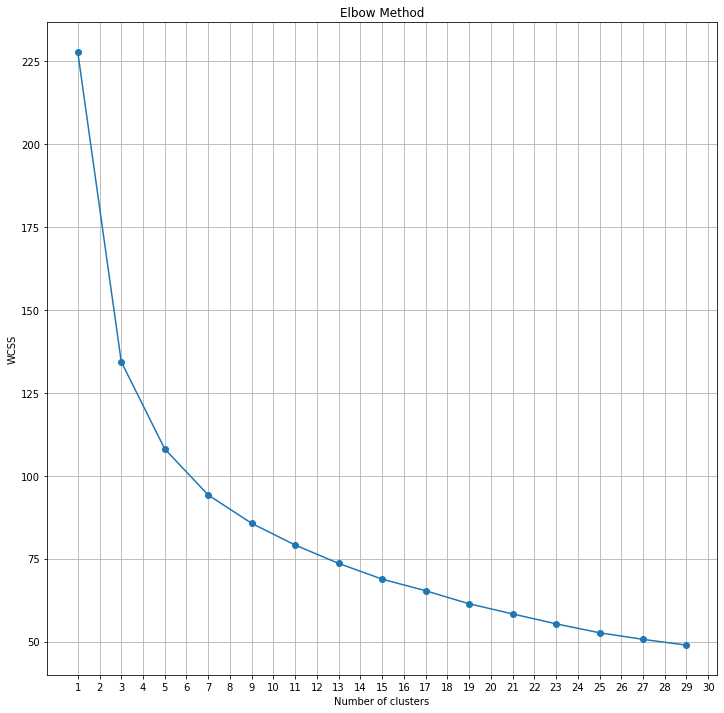

In [64]:
WCSS = []
for i in range(1, 31, 2):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_mm)
    WCSS.append(kmeans.inertia_)

fig = plt.figure(figsize = (12,12))
plt.plot(range(1,31,2), WCSS, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.xticks([j for j in range(1,31)])
plt.grid()
plt.show()

In [65]:
kmeans_cluster = KMeans(n_clusters = 7, max_iter = 100)
y_kmeans = kmeans_cluster.fit_predict(X_mm)          #when you use kmeans_cluster.fit instead of kmeans_cluster.fit_predict, you can useg kmeans_cluster.labels_

In [66]:
from sklearn.decomposition import IncrementalPCA

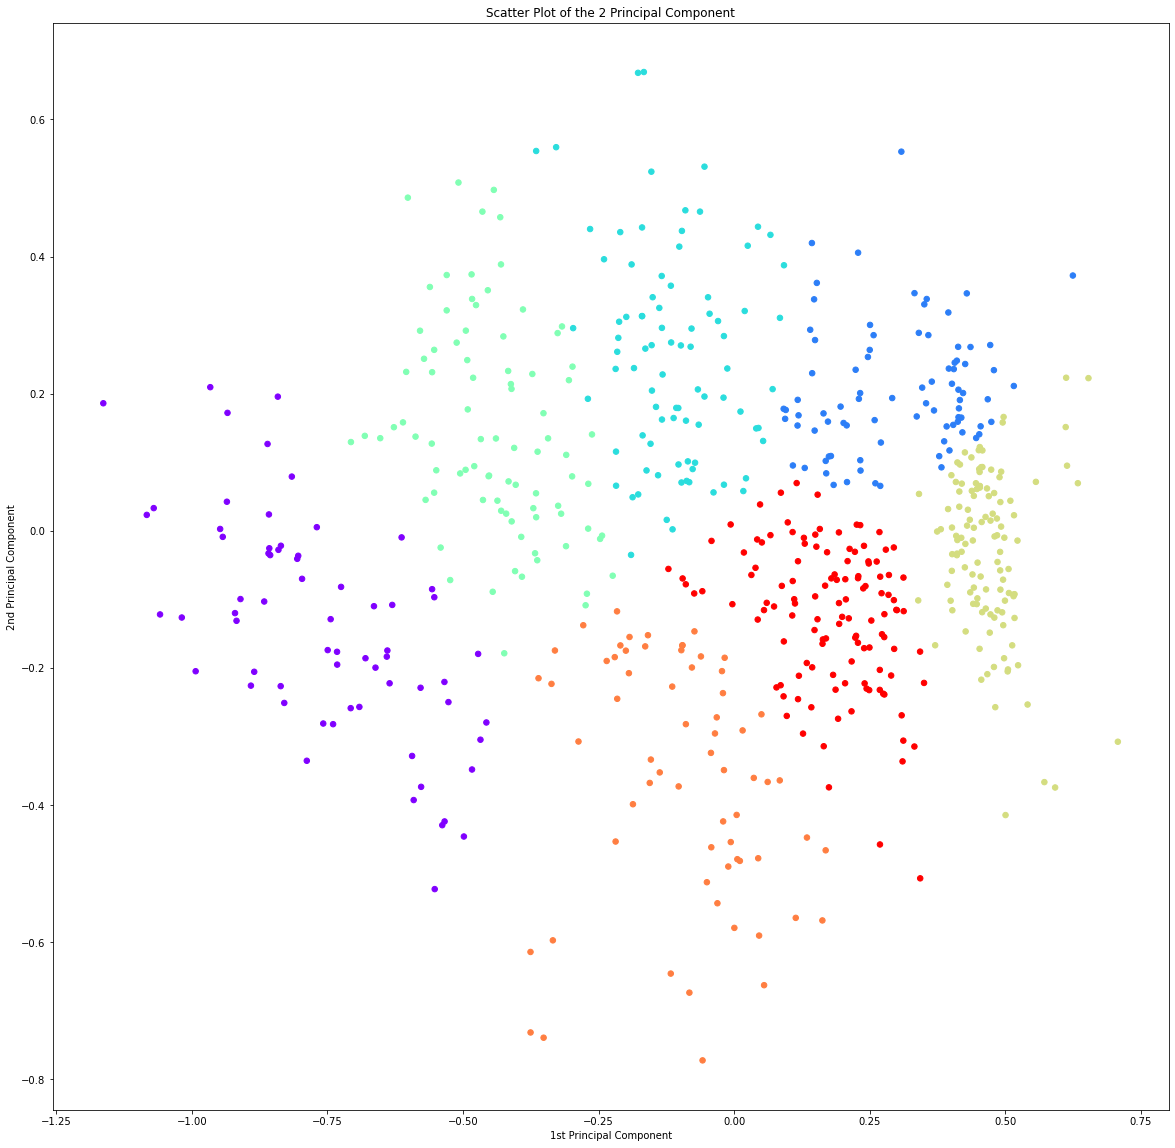

In [67]:
""" Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible """
pca = IncrementalPCA(n_components = 2)
X_pca = pca.fit_transform(X_mm)

""" Applying K-means Clustering """
model = KMeans(n_clusters = 7, random_state = 1234).fit(X_pca)
y_l_cluster = model.predict(X_pca)

""" Visualising clusters """
fig = plt.figure(figsize=(20, 20))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_l_cluster, s = 30, cmap='rainbow')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot of the 2 Principal Component')
plt.show()

In [68]:
""" Incremental Principal Component Analysis to select 3 features such that they explain as much variance as possible """
pca1 = IncrementalPCA(n_components = 3)
X_pca1 = pca1.fit_transform(X_mm)

""" Applying K-means Clustering """
model1 = KMeans(n_clusters = 7, random_state = 1234).fit(X_pca1)
y_l_cluster1 = model1.predict(X_pca1)

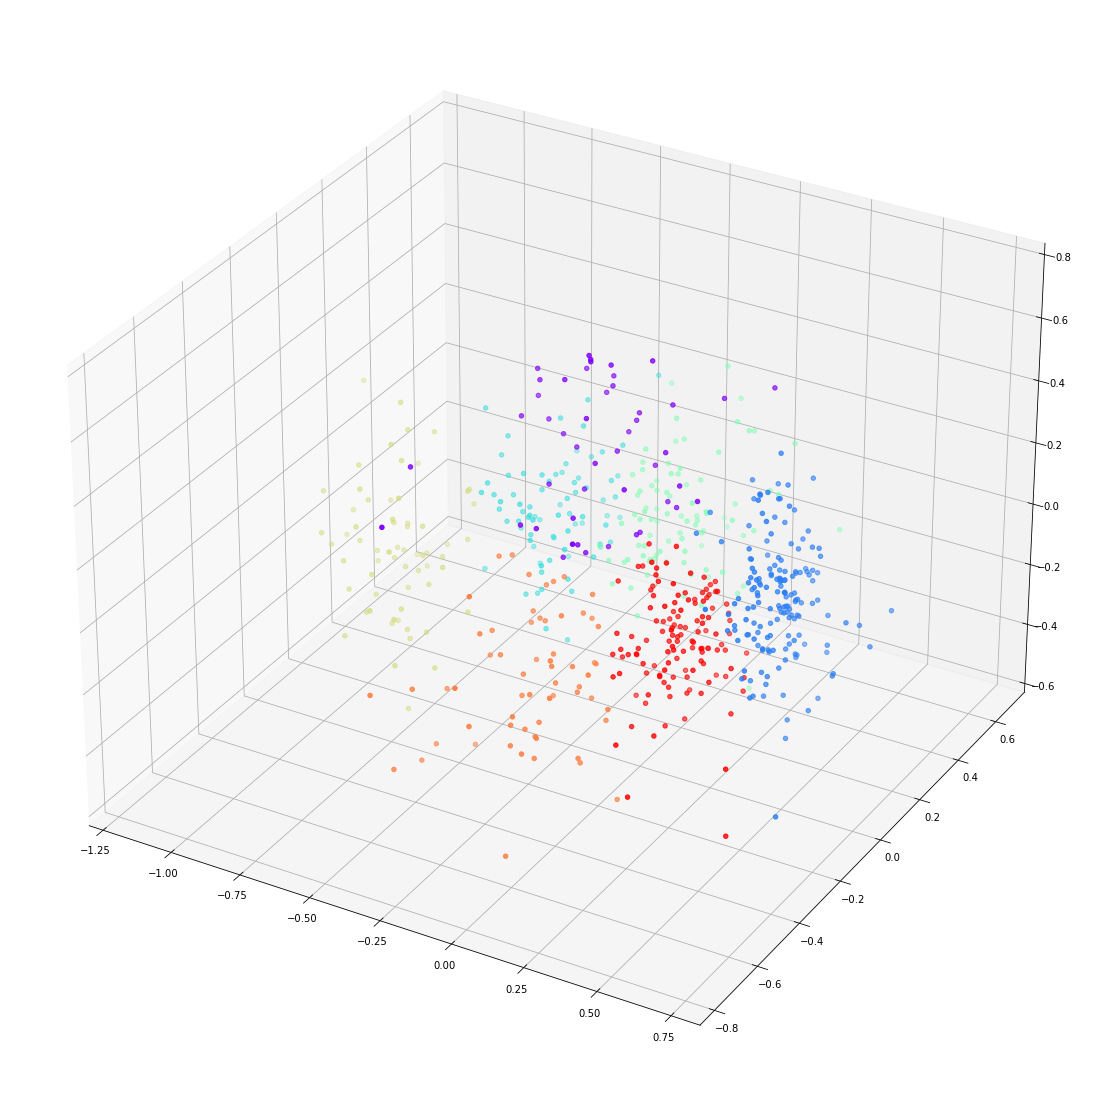

In [69]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca1[:,0], X_pca1[:,1], X_pca1[:,2], c = y_l_cluster1, cmap = 'rainbow')

In [70]:
from scipy.spatial.distance import cdist

In [71]:
# obtaining the centers of the clusters
centroids = kmeans_cluster.cluster_centers_

# points array will be used to reach the index easy
points = np.empty((0,len(X[0])), float)

# distances will be used to calculate outliers
distances = np.empty((0,len(X[0])), float)

# getting points and distances
for i, center_elem in enumerate(centroids):
    
    # cdist is used to calculate the distance between center and other points
    distances = np.append(distances, cdist([center_elem],X[y_kmeans == i], 'euclidean')) 
    points = np.append(points, X[y_kmeans == i], axis=0)

In [72]:
percentile = 75

# getting outliers whose distances are greater than some percentile
outliers = points[np.where(distances > np.percentile(distances, percentile))]
X_final = points[np.where(distances <= np.percentile(distances, percentile))]

In [73]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data4)

In [74]:
data4["anomaly"] = pd.Series(preds)
data5 = data4[data4["anomaly"] != -1].drop("anomaly", axis = 1)

In [75]:
data5.shape

(556, 27)

## Handle Duplicates

In [76]:
data5.duplicated().sum()

0

## Statistical Analysis

In [77]:
data5["total_price"] = data5["price_usd"] + data5["price_rub"]
data6 = data5.drop(["price_usd","price_rub"], axis = 1)

<AxesSubplot:>

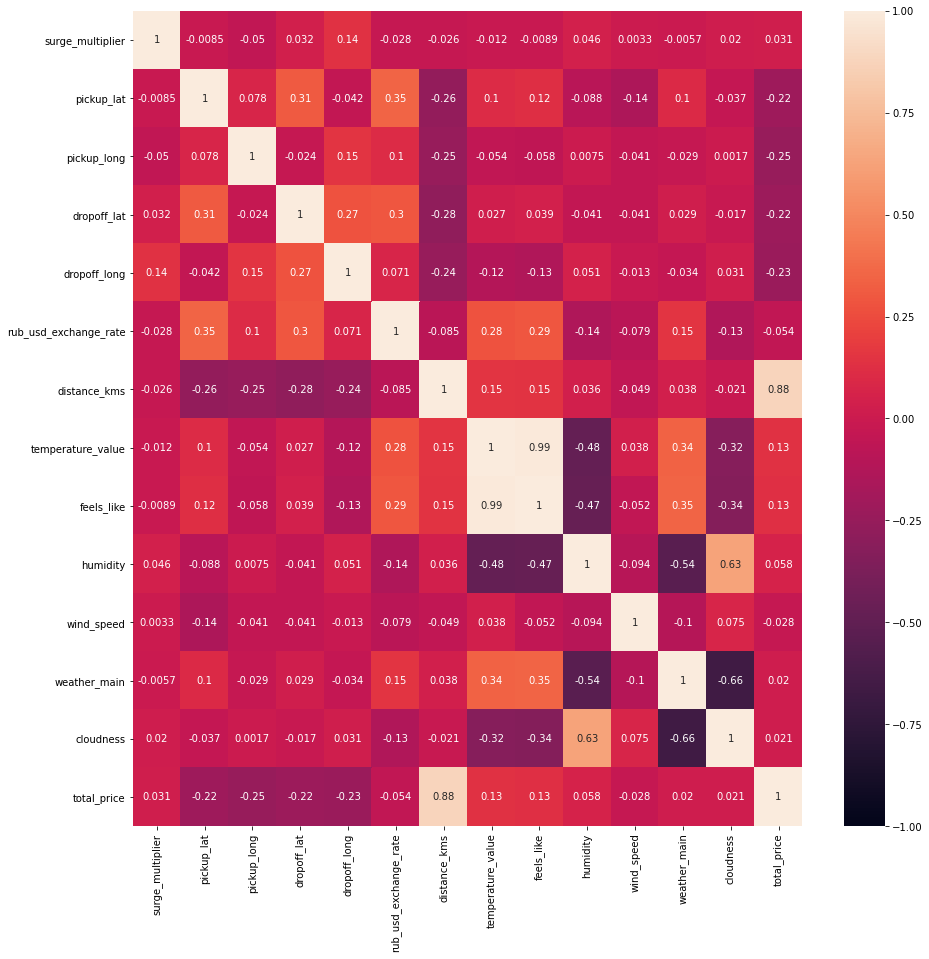

In [78]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(data6.iloc[:,[3,5,6,7,8,9,10,11,12,13,14,15,16,-1]].corr(), annot = True, vmin = -1, vmax = 1)

In [79]:
from scipy import stats
rho, pvalue = stats.spearmanr(data6.iloc[:,[4,-9,-8,-7,-6,-5,-4,-3]], data6.iloc[:,-1])

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [80]:
rho = pd.DataFrame(rho).fillna(0).values

<AxesSubplot:>

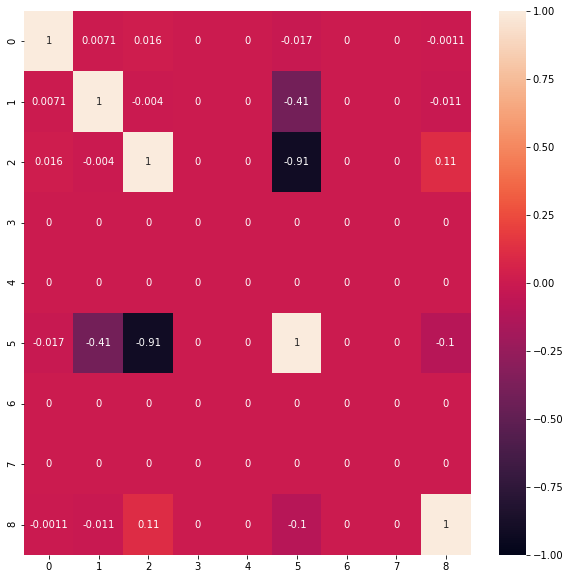

In [81]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(rho, annot = True, vmin = -1, vmax = 1)

In [82]:
mod = ols('trip_type_uberBEAUTY ~ total_price', data = data6).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
               sum_sq     df         F    PR(>F)
total_price  0.000277    1.0  0.153719  0.695157
Residual     0.997925  554.0       NaN       NaN



In [83]:
mod = ols('trip_type_uberBLACK ~ total_price', data = data6).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
               sum_sq     df         F    PR(>F)
total_price  0.034021    1.0  3.830037  0.050844
Residual     4.921015  554.0       NaN       NaN



In [84]:
mod = ols('trip_type_uberELKA ~ total_price', data = data6).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
             sum_sq     df   F  PR(>F)
total_price     NaN    1.0 NaN     NaN
Residual        0.0  554.0 NaN     NaN



C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J


In [85]:
mod = ols('trip_type_uberSELECT ~ total_price', data = data6).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
             sum_sq     df   F  PR(>F)
total_price     NaN    1.0 NaN     NaN
Residual        0.0  554.0 NaN     NaN



C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J


In [86]:
mod = ols('trip_type_uberX ~ total_price', data = data6).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
               sum_sq     df         F   PR(>F)
total_price  0.028159    1.0  2.640952  0.10471
Residual     5.907092  554.0       NaN      NaN



In [87]:
mod = ols('city_Ekaterinburg ~ total_price', data = data6).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
             sum_sq     df   F  PR(>F)
total_price     NaN    1.0 NaN     NaN
Residual        0.0  554.0 NaN     NaN



C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J


In [88]:
mod = ols('city_Moscow ~ total_price', data = data6).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
             sum_sq     df   F  PR(>F)
total_price     NaN    1.0 NaN     NaN
Residual        0.0  554.0 NaN     NaN



C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J


## Feature Selection

#### Eliminate low variance features

In [89]:
from sklearn import feature_selection as fs

In [90]:
## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(data6)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

[ True  True  True False False False False False False  True  True  True
  True False  True  True False False False False False False False False
 False  True]
(556, 10)


In [91]:
data6.iloc[:,[0,1,2,9,10,11,12,14,15,25]].columns

Index(['trip_time(minute)', 'total_time(minute)', 'wait_time(minute)',
       'rub_usd_exchange_rate', 'distance_kms', 'temperature_value',
       'feels_like', 'wind_speed', 'weather_main', 'total_price'],
      dtype='object')

In [139]:
data6_elvf = data6.iloc[:,[0,1,2,9,10,11,12,14,15,25]]

#### Principal Feature Analysis (PFA)

In [115]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

In [136]:
pfa = PFA(n_features = 15)
pfa.fit(data6)

# To get the transformed matrix
x = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_

In [137]:
column_indices

[0, 1, 2, 3, 4, 5, 14, 8, 13, 10, 12, 19, 22, 24, 25]

In [143]:
data6.iloc[:,[0, 1, 2, 3, 4, 5, 14, 8, 13, 10, 12, 25]].columns

Index(['trip_time(minute)', 'total_time(minute)', 'wait_time(minute)',
       'surge_multiplier', 'driver_gender', 'pickup_lat', 'wind_speed',
       'dropoff_long', 'humidity', 'distance_kms', 'feels_like',
       'total_price'],
      dtype='object')

In [144]:
data6_pfa = data6.iloc[:,[0, 1, 2, 3, 4, 5, 14, 8, 13, 10, 12, 25]]

# Price Prediction with Regression (Regression Analysis)

### Splitting the Dataset into the Training set and the Test set

In [95]:
X = data7.iloc[:,:-1]
Y = data7.iloc[:,-1]

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

#### LGBM

In [94]:
from lightgbm import LGBMRegressor

In [99]:
# grid search hyperparameters for the LGBMRegressor
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = LGBMRegressor()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['boosting_type'] = ["gbdt", "dart", "goss", "rf"]
grid['num_leaves'] = [7, 14, 21, 28, 31, 50]
grid['learning_rate'] = [0.1, 0.03, 0.003]
grid['max_depth'] = [j for j in range(-1,26)]
grid['n_estimators'] = [50, 100, 200, 500]

# define search
search = GridSearchCV(model, grid, scoring= 'neg_mean_absolute_error', cv = 5, n_jobs = -1)

# perform the search
results = search.fit(X_train , Y_train)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9720 fits failed out of a total of 38880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\L

MAE: -40.227
Config: {'boosting_type': 'dart', 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500, 'num_leaves': 7}


In [100]:
LGBM_model = LGBMRegressor(boosting_type = 'dart', learning_rate = 0.1, max_depth = 2, n_estimators = 500, num_leaves = 7)
LGBM_model.fit(X_train, Y_train)

LGBMRegressor(boosting_type='dart', max_depth=2, n_estimators=500, num_leaves=7)

In [101]:
pred_LGBM = LGBM_model.predict(X_test)

In [109]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_LGBM = mean_squared_error(Y_test, pred_LGBM)

#RMSE: Root Means Squared Error
RMSE_LGBM = np.sqrt(MSE_LGBM)

#RMSLE: Root Mean Squared Log Error
RMSLE_LGBM = np.sqrt(mean_squared_log_error(Y_test, pred_LGBM))

#MAE: Mean Absolute Error
MAE_LGBM = mean_absolute_error(Y_test, pred_LGBM)

#MAPE: Mean Absolute Percentage Error
MAPE_LGBM = mean_absolute_percentage_error(Y_test, pred_LGBM)

#R² Score
R2_LGBM = r2_score(Y_test, pred_LGBM)

#MPL: Mean Pinball Loss
MPL_LGBM = mean_pinball_loss(Y_test, pred_LGBM, alpha=0.1)

#Finalization
LGBM_data = {"MSE": MSE_LGBM, 
      "RMSE": RMSE_LGBM,
      "MAE": MAE_LGBM,
      "MAPE": MAPE_LGBM, 
      "R² Score":R2_LGBM, 
      "MPL":MPL_LGBM}
LGBM = pd.DataFrame(LGBM_data, index = ["LGBM"])
LGBM

,MSE,RMSE,MAE,MAPE,R² Score,MPL
LGBM,6483.376613,80.519418,43.556734,0.152899,0.722231,17.993521


#### Gradient Boosting Regressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

In [105]:
# grid search hyperparameters for the Gradient Boosting Regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# define model
model = GradientBoostingRegressor(subsample=0.8)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

# define grid
grid = dict()
grid['max_depth'] = range(2,15)
grid['criterion']=['friedman_mse', 'squared_error', 'mse', 'mae']
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train, Y_train)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.wa

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_cl

MAE: -38.255
Config: {'criterion': 'mae', 'max_depth': 2}


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


In [106]:
GBR_model = GradientBoostingRegressor (max_depth = 2, criterion = "mae", subsample = 0.8)
GBR_model.fit(X_train, Y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.wa

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_cl

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_cl

GradientBoostingRegressor(criterion='mae', max_depth=2, subsample=0.8)

In [107]:
pred_GBR = GBR_model.predict(X_test)

In [110]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_GBR = mean_squared_error(Y_test, pred_GBR)

#RMSE: Root Means Squared Error
RMSE_GBR = np.sqrt(MSE_GBR)

#RMSLE: Root Mean Squared Log Error
RMSLE_GBR = np.sqrt(mean_squared_log_error(Y_test, pred_GBR))

#MAE: Mean Absolute Error
MAE_GBR = mean_absolute_error(Y_test, pred_GBR)

#MAPE: Mean Absolute Percentage Error
MAPE_GBR = mean_absolute_percentage_error(Y_test, pred_GBR)

#R² Score
R2_GBR = r2_score(Y_test, pred_GBR)

#MPL: Mean Pinball Loss
MPL_GBR = mean_pinball_loss(Y_test, pred_GBR, alpha=0.1)

#Finalization
GBR_data = {"MSE": MSE_GBR, 
      "RMSE": RMSE_GBR,
      "MAE": MAE_GBR,
      "MAPE": MAPE_GBR, 
      "R² Score":R2_GBR, 
      "MPL":MPL_GBR}
GBR = pd.DataFrame(GBR_data, index = ["GBR"])
GBR

,MSE,RMSE,MAE,MAPE,R² Score,MPL
GBR,5375.724868,73.319335,38.814001,0.132185,0.769686,14.258537


#### XGBoost Regressor

In [112]:
!pip install xgboost

In [113]:
from xgboost.sklearn import XGBRegressor

In [114]:
# grid search hyperparameters for the XGBRegressor
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = XGBRegressor()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid["learning_rate"] = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
grid["max_depth"] = [ 3, 4, 5, 6 , 7 , 8 , 9 , 10]
grid["min_child_weight"] = [ 1, 3, 5, 7 ]
grid["gamma"] = [ 0.0, 0.1, 0.2 , 0.3, 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]
grid["colsample_bytree"] = [ 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv = 3, verbose = 0, n_jobs = -1)

# perform the search
results = search.fit(X_train, Y_train)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -40.503
Config: {'colsample_bytree': 0.8, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3}


In [145]:
XGB_model = XGBRegressor(colsample_bytree = 0.8, gamma = 0.0, learning_rate= 0.05, max_depth= 4, min_child_weight= 3)
XGB_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [146]:
pred_XGB = XGB_model.predict(X_test)

In [147]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_XGB = mean_squared_error(Y_test, pred_XGB)

#RMSE: Root Means Squared Error
RMSE_XGB = np.sqrt(MSE_XGB)

#RMSLE: Root Mean Squared Log Error
RMSLE_XGB = np.sqrt(mean_squared_log_error(Y_test, pred_XGB))

#MAE: Mean Absolute Error
MAE_XGB = mean_absolute_error(Y_test, pred_XGB)

#MAPE: Mean Absolute Percentage Error
MAPE_XGB = mean_absolute_percentage_error(Y_test, pred_XGB)

#R² Score
R2_XGB = r2_score(Y_test, pred_XGB)

#MPL: Mean Pinball Loss
MPL_XGB = mean_pinball_loss(Y_test, pred_XGB, alpha=0.1)

#Finalization
XGB_data = {"MSE": MSE_XGB, 
      "RMSE": RMSE_XGB,
      "MAE": MAE_XGB,
      "MAPE": MAPE_XGB, 
      "R² Score":R2_XGB, 
      "MPL":MPL_XGB}
XGB = pd.DataFrame(XGB_data, index = ["XGB"])
XGB

,MSE,RMSE,MAE,MAPE,R² Score,MPL
XGB,5501.089707,74.169331,41.73124,0.149263,0.764315,18.01749
